In [ ]:
# author: Andrew Smith
# description: based on tutorial from https://github.com/PLN-FaMAF/Bias-in-word-embeddings/blob/main/main_tutorial_bias_word_embedding.ipynb
# date: 8 December 2022
# file: main.ipynb

In [2]:
%pip install responsibly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 28.2 MB 52.6 MB/s 
     |████████████████████████████████| 36.7 MB 251 kB/s 
     |████████████████████████████████| 23.4 MB 39.1 MB/s 
  Created wheel for gensim: filename=gensim-3.7.3-cp38-cp38-linux_x86_64.whl size=25861622 sha256=ce2b6e0add81171e9bcbb15e05ea938d4a89de4dc96a3b68c7176fe4dfc1a719
  Stored in directory: /root/.cache/pip/wheels/dd/a5/27/d48d7feb5a01ddba1a11f9be5cc84a2853862b353e71938dae
  Created wheel for matplotlib: filename=matplotlib-2.2.5-cp38-cp38-linux_x86_64.whl size=10811572 sha256=d0f97a85dbfddb50443ec037f1b5c24c6cc314d3f15a6be0b75dd30c2630974e
  Stored in directory: /root/.cache/pip/wheels/26/dc/65/d27080ab002cb70bcc99bae054a4ad6b6ae24e8e2b1c472d34
Successfully built gensim matplotlib
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully u

In [1]:
import responsibly

In [2]:
# You should get '0.1.3'
responsibly.__version__

'0.1.3'

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
# a) load word embedding
from responsibly.we import load_w2v_small

w2v_small = load_w2v_small()

In [5]:
# dataset vocabulary size

len(w2v_small.vocab)

26423

In [7]:
print('king =', w2v_small['king'])

king = [ 4.34064e-02  1.02628e-02  2.96526e-03  4.81172e-02 -8.83269e-03
 -1.24499e-02  3.85274e-02 -6.83062e-02  1.76654e-02  1.25172e-01
 -8.34479e-02 -1.04310e-01 -6.12400e-02 -8.58033e-03 -5.78752e-02
 -5.85481e-02  1.19452e-02  1.79808e-03  1.59830e-02  4.44158e-02
  4.71077e-02  3.88639e-02  2.05255e-02  4.71077e-02  3.48261e-02
 -6.09035e-02 -8.68128e-02  2.06096e-02  1.17769e-01 -1.07254e-02
  3.60037e-02  2.12826e-02  4.29017e-02  1.37958e-01 -1.11040e-01
  2.89376e-02  1.34593e-02  2.01890e-03  2.42268e-02  5.95576e-02
  4.77807e-02 -7.97466e-02  9.75802e-02  4.91266e-02  1.17769e-01
 -8.24385e-03 -3.78544e-02  1.14404e-02 -1.88431e-02  5.27859e-03
 -5.58563e-02  5.45103e-02 -8.95046e-02  6.93997e-03 -5.61928e-02
  4.67923e-04 -4.97996e-02 -1.96002e-02  1.48053e-02 -8.49621e-03
  6.39319e-02  1.54109e-01  3.30175e-03  4.54253e-02  3.39848e-02
 -6.39319e-02 -3.44896e-02 -4.60983e-02 -4.30699e-02  9.75802e-02
  4.23969e-02  1.83384e-02 -6.12400e-02  2.96106e-02 -7.52882e-03
  7

In [9]:
w2v_small['king'] @ w2v_small['king']

1.0000005

In [10]:
w2v_small['king'] @ w2v_small['kings']

0.7138046

In [12]:
w2v_small['king'] @ w2v_small['queen']

0.65109617

In [14]:
w2v_small['king'] @ w2v_small['peasant']

0.18507907

In [15]:
w2v_small['king'] @ w2v_small['law']

0.13374643

In [17]:
w2v_small.most_similar('king', topn=5)

[('kings', 0.7138044834136963),
 ('queen', 0.6510957479476929),
 ('monarch', 0.6413193941116333),
 ('prince', 0.6159992814064026),
 ('ruler', 0.5797565579414368)]

In [21]:
w2v_small.doesnt_match('ugly sad strong king queen'.split())

'strong'

In [24]:
w2v_small.doesnt_match('ugly sad strong king queen pretty'.split())

'strong'

In [26]:
w2v_small.doesnt_match('ugly sad strong king queen pretty weak'.split())

'queen'

In [28]:
w2v_small.doesnt_match('ugly sad strong king queen pretty weak valuable'.split())

'valuable'

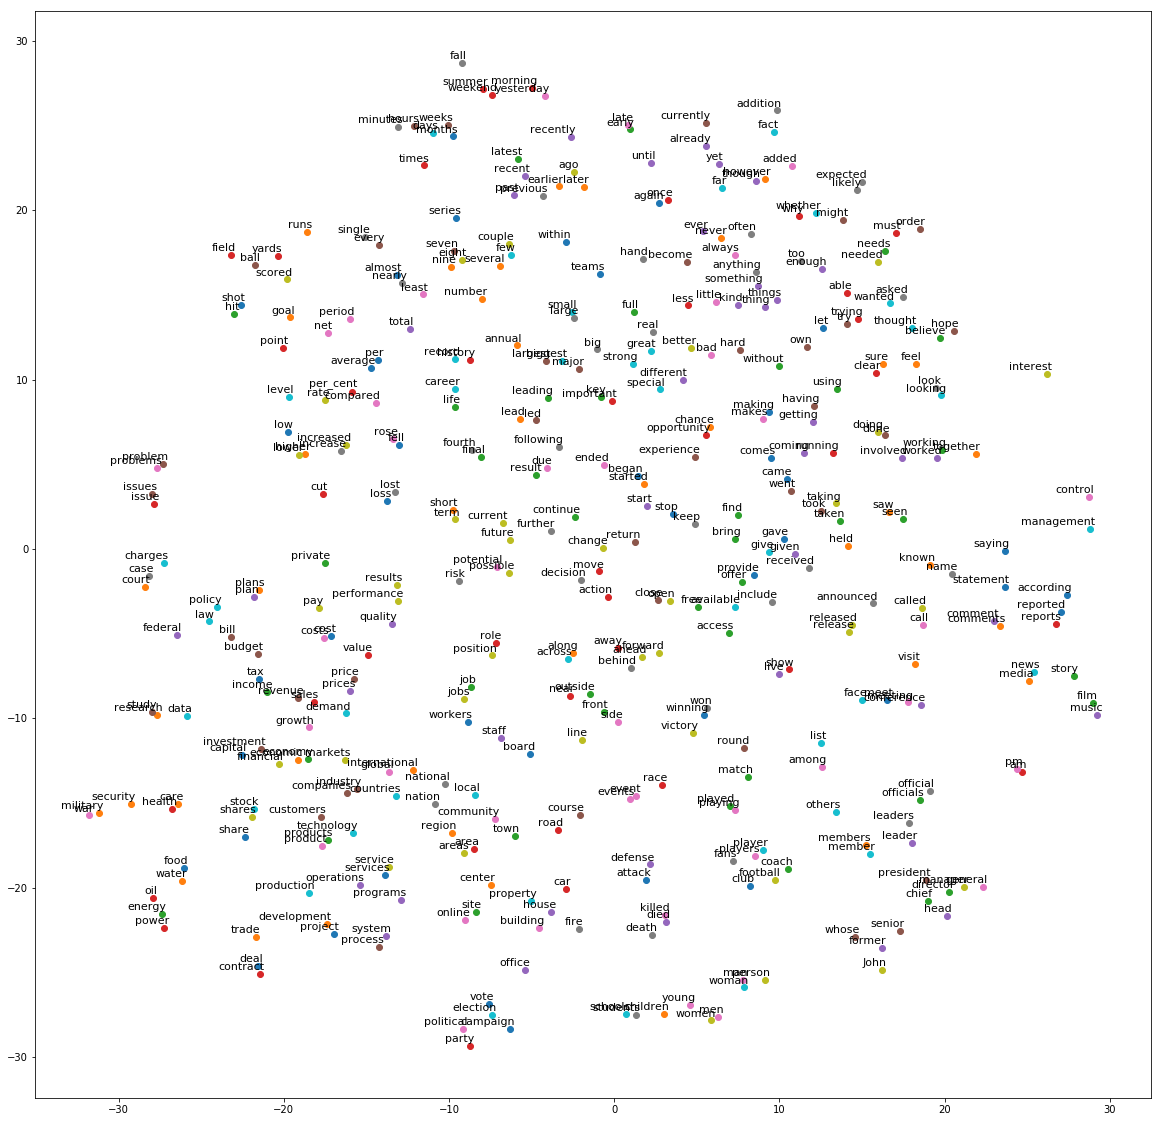

In [29]:
# b. do visualization
from sklearn.manifold import TSNE
from matplotlib import pylab as plt

# take the most common words in the corpus between 200 and 600
words = [word for word in w2v_small.index2word[200:600]]

# convert the words to vectors
embeddings = [w2v_small[word] for word in words]

# perform T-SNE
words_embedded = TSNE(n_components=2).fit_transform(embeddings)

# ... and visualize!
plt.figure(figsize=(20, 20))
for i, label in enumerate(words):
    x, y = words_embedded[i, :]
    plt.scatter(x, y)
    plt.annotate(label, xy=(x, y), xytext=(5, 2), textcoords='offset points',
                 ha='right', va='bottom', size=11)
plt.show()

In [30]:
# small is to smaller as good is to what?
w2v_small.most_similar(positive=['good', 'smaller'], negative=['small'], topn=2)

[('better', 0.7270160913467407), ('stronger', 0.5597214102745056)]

In [31]:
# man is to carpenter as woman is to what?
w2v_small.most_similar(positive=['carpenter', 'woman'], negative=['men'], topn=2)

[('schoolteacher', 0.590914785861969), ('homemaker', 0.5572819709777832)]

In [32]:
# She is to sister as he is to what?
# sister - she + he = ?

w2v_small.most_similar(positive=['sister', 'he'], negative=['she'], topn=5)

[('brother', 0.7627110481262207),
 ('younger_brother', 0.6856132745742798),
 ('cousin', 0.6685015559196472),
 ('uncle', 0.6580697894096375),
 ('nephew', 0.65260249376297)]

In [33]:
#She is to interior designer as he is to what?
w2v_small.most_similar(positive=['interior_designer', 'he'], negative=['she'], topn=4)

[('architect', 0.623257040977478),
 ('carpenter', 0.46738606691360474),
 ('painter', 0.4598923623561859),
 ('restaurateur', 0.4586508572101593)]

In [34]:
# c. run analogies: examples and your own
# he is to prisoner as she is to what?
w2v_small.most_similar(positive=['prisoner', 'she'], negative=['he'], topn=4)

[('prisoners', 0.6122967600822449),
 ('inmate', 0.5673017501831055),
 ('inmates', 0.5304307341575623),
 ('detainee', 0.5057013034820557)]

In [36]:
# he is to ugly as she is to what?
w2v_small.most_similar(positive=['ugly', 'she'], negative=['he'], topn=4)

[('hideous', 0.47902002930641174),
 ('nasty', 0.47256362438201904),
 ('messy', 0.4575970768928528),
 ('ugliest', 0.4533573389053345)]

In [37]:
# he is to poor as she is to what?
w2v_small.most_similar(positive=['poor', 'she'], negative=['he'], topn=4)

[('poorer', 0.4850721061229706),
 ('poorest', 0.4540843665599823),
 ('poverty_stricken', 0.44274094700813293),
 ('destitute', 0.43766525387763977)]

In [39]:
# he is to depressed as she is to what?
w2v_small.most_similar(positive=['depressed', 'she'], negative=['he'], topn=4)

[('distressed', 0.42334049940109253),
 ('neurotic', 0.4074500799179077),
 ('traumatized', 0.4063734710216522),
 ('depressing', 0.40597712993621826)]

In [40]:
# he is to worthless as she is to what?
w2v_small.most_similar(positive=['worthless', 'she'], negative=['he'], topn=4)

[('useless', 0.511770486831665),
 ('hers', 0.4237804412841797),
 ('unattractive', 0.4071286916732788),
 ('invalid', 0.3700859248638153)]

In [41]:
# she is to beautiful as he is to?
w2v_small.most_similar(positive=['beautiful', 'he'], negative=['she'], topn=4)

[('magnificent', 0.631207287311554),
 ('majestic', 0.5676087141036987),
 ('lovely', 0.5434998273849487),
 ('gorgeous', 0.5429219007492065)]

In [42]:
from numpy.linalg import norm

gender_direction = w2v_small['she'] - w2v_small['he']

gender_direction /= norm(gender_direction)

In [43]:
# the @ operator returns the cosine similarity of 2 normalized vectors
gender_direction @ w2v_small['architect']

-0.16785555

In [44]:
gender_direction @ w2v_small['interior_designer']

0.19714224

In [46]:
gender_direction @ w2v_small['prisoner']

-0.049564533

In [47]:
gender_direction @ w2v_small['smart']

-0.07592461

In [48]:
gender_direction @ w2v_small['wise']

-0.1005373

In [49]:
from responsibly.we import GenderBiasWE

w2v_small_gender_bias = GenderBiasWE(w2v_small, only_lower=True)

In [50]:
w2v_small_gender_bias.positive_end, w2v_small_gender_bias.negative_end

('she', 'he')

In [51]:
# gender direction
w2v_small_gender_bias.direction[:10]

array([-0.10056252, -0.09987912, -0.05384335,  0.00480521,  0.01521063,
       -0.01666582,  0.00932552, -0.00625998, -0.11320096,  0.03992424])

In [52]:
# list of gender neutral professions
from responsibly.we.data import BOLUKBASI_DATA

neutral_profession_names = BOLUKBASI_DATA['gender']['neutral_profession_names']

In [53]:
neutral_profession_names[:8]

['accountant',
 'acquaintance',
 'actor',
 'adjunct_professor',
 'administrator',
 'adventurer',
 'advocate',
 'aide']

In [54]:
len(neutral_profession_names)

303

In [56]:
# the same of using the @ operator on the bias direction

w2v_small_gender_bias.project_on_direction(neutral_profession_names[0])

0.008421647916552755

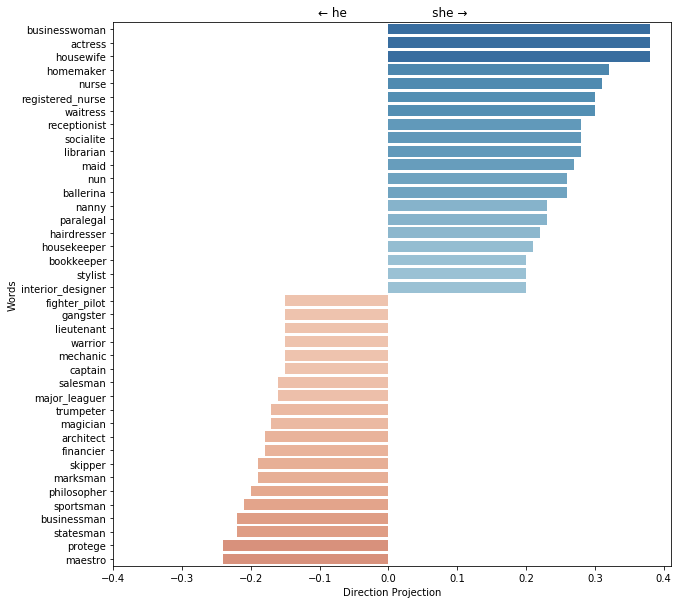

In [57]:
import matplotlib.pylab as plt

f, ax = plt.subplots(1, figsize=(10, 10))

w2v_small_gender_bias.plot_projection_scores(n_extreme=20, ax=ax);

In [58]:
 #d. run one mitigation method
 # high-level function to calculate gender bias built into responsibly

w2v_small_gender_bias.calc_direct_bias()

0.07307905466893873

In [59]:
# what responsibly does within the calc_direct_bias function:

neutral_profession_projections = [w2v_small[word] @ w2v_small_gender_bias.direction
                                  for word in neutral_profession_names]

abs_neutral_profession_projections = [abs(proj) for proj in neutral_profession_projections]

sum(abs_neutral_profession_projections) / len(abs_neutral_profession_projections)

0.07307905457595647

In [61]:
len(w2v_small_gender_bias._data['neutral_words'])

26189

In [62]:
import random
print(random.sample(w2v_small_gender_bias._data['neutral_words'],10))

['fails', 'backhand', 'mishandling', 'disclose', 'jets', 'slang', 'undeniably', 'rebuttal', 'fearful', 'outflows']


In [66]:
# here is the neutralization mitigation technique
# we obtain a version of the embeddings that is mitigated wrt the gender direction
w2v_small_gender_debias = w2v_small_gender_bias.debias(method='neutralize', inplace=False)

In [67]:
# measure of bias in the original embeddings
w2v_small_gender_bias.calc_direct_bias()

0.07307905479130265

In [68]:
# measure of bias in the mitigated embeddings
w2v_small_gender_debias.calc_direct_bias()

1.1724634785448746e-09

In [69]:
'home' in (w2v_small_gender_bias._data['neutral_words'])

True

In [70]:
print('home:',
      'before =', w2v_small_gender_bias.model['home'] @ w2v_small_gender_bias.direction,
      'after = ', w2v_small_gender_debias.model['home'] @ w2v_small_gender_debias.direction)

home: before = 0.011340496779172262 after =  -1.1762454503583112e-09


In [71]:
print('architect:',
      'before =', w2v_small_gender_bias.model['architect'] @ w2v_small_gender_bias.direction,
      'after = ', w2v_small_gender_debias.model['architect'] @ w2v_small_gender_debias.direction)

architect: before = -0.17738309189742663 after =  -4.154597468190944e-10


In [72]:
print('interior_designer:',
      'before =', w2v_small_gender_bias.model['interior_designer'] @ w2v_small_gender_bias.direction,
      'after = ', w2v_small_gender_debias.model['interior_designer'] @ w2v_small_gender_debias.direction)

interior_designer: before = 0.19845774284382503 after =  2.8877261947770835e-09


In [73]:
'man' in (w2v_small_gender_bias._data['neutral_words'])

False

In [74]:
print('man:',
      'before =', w2v_small_gender_bias.model['man'] @ w2v_small_gender_bias.direction,
      'after = ', w2v_small_gender_debias.model['man'] @ w2v_small_gender_debias.direction)

man: before = -0.22095192936041713 after =  -0.2209519293604172


In [75]:
print('woman:',
      'before =', w2v_small_gender_bias.model['woman'] @ w2v_small_gender_bias.direction,
      'after = ', w2v_small_gender_debias.model['woman'] @ w2v_small_gender_debias.direction)

woman: before = 0.3403474745246814 after =  0.3403474745246813


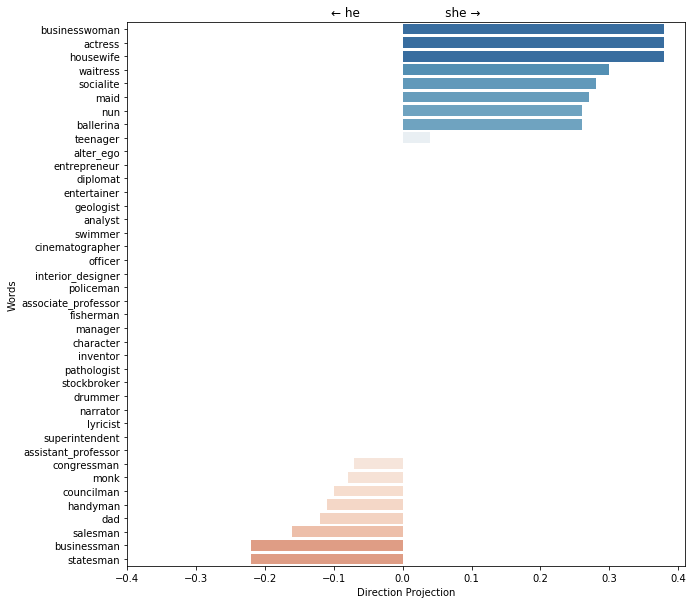

In [76]:
f, ax = plt.subplots(1, figsize=(10, 10))

w2v_small_gender_debias.plot_projection_scores(n_extreme=20, ax=ax);